      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1   
 (5110, 12) 

Análisis de los datos faltantes:
        

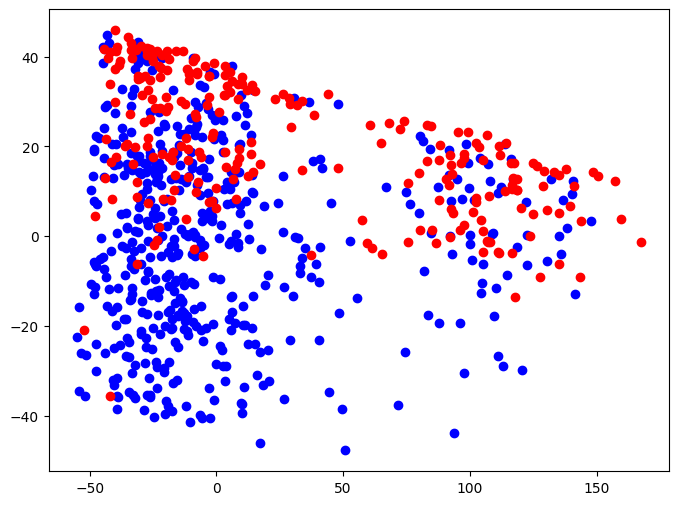

In [3]:
# Equipo ALPHA Pablo, Juan, Álvaro

# Importamos las librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Importamos el dataset y creamos el dataframe con pandas
df = pd.read_csv('/home/albaro/Documentos/SAA/SAA || Modelos de IA/PCA/Ejercicio_PCA/healthcare-dataset-stroke-data.csv')
df = pd.DataFrame(df)

# Mostramos las primeras lineas y el recuento de columnas y filas
print(df.head(), '\n', df.shape, '\n')

# Revisamos si hay alguna columna con un valor nulo
mask = df.isnull()
total = mask.sum()
porce = 100 * mask.mean()

# Creamos un DataFrame para mostrar el análisis de los datos faltantes
missing_data = pd.concat([total, porce], axis=1, join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
print('Análisis de los datos faltantes:\n', missing_data, '\n')

# Rellenamos los datos faltantes con la media
df.loc[:, 'bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Actualizamos el recuento de datos faltantes
mask=df.isnull()
total = mask.sum()
porce = 100 * mask.mean()

# Volvemos a mostrar los valores nulos para revisar que se hayan rellenado
missing_data = pd.concat([total, porce], axis=1, join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
print('Análisis de los datos faltantes:\n', missing_data, '\n')

#Nos deshacemos de los valores no numéricos y del id, asi como la variable objetivo stroke
x = df.drop(['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis='columns')
y = df.stroke

#reducimos la escala para hacer los datos más manejables
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)


#Dividimos los datos en entrenamiento y pruebas
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=30)
print("input - training set :", x_train.shape)
print("output - training set :", y_train.shape)
print("input - validation set :", x_test.shape)
print("output - validation set :", y_test.shape, '\n')


#Creamos el modelo de prediccion, en este caso de regresión logistica
model = LogisticRegression()

#Realizamos la validación cruzada
scores = cross_val_score(model, x_train, y_train, cv=5)
print("Resultados de la validación cruzada:")
print("Puntuación media:", scores.mean()*100, '%')
print("Desviación estándar:", scores.std(), '\n')

#Entrenamos el modelo con los datos de entrenamiento
model.fit(x_train, y_train)

#Posteriormente comprobamos su eficacia con el conjunto de datos de prueba
precision = model.score(x_test, y_test)*100
print('Precisión del modelo: ', precision, '%')

#Implementamos PCA para reducir la cantidad de variables, haciendo que sea mas facil visualizar los datos

pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print('Columnas y filas iniciales: ', x.shape)
print('Columnas y filas tras el PCA: ', x_pca.shape, '\n')

#Entrenamos otro modelo, esta vez con los datos reducidos con PCA
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=30)
model_pca = LogisticRegression(max_iter=1000, random_state=42)
model_pca.fit(x_train_pca, y_train)

#verificamos de nuevo los resultados
scores_pca = cross_val_score(model_pca, x_train_pca, y_train, cv=5)
print("Resultados de la validación cruzada:")
print("Puntuación media:", scores_pca.mean()*100, '%')
print("Desviación estándar:", scores_pca.std(), '\n')
precision_pca  = model_pca.score(x_test_pca, y_test)*100
print('Precisión del modelo tras el PCA: ', precision_pca, '%\n')
print('Comparativa de métricas antes y después del PCA:\nPrecisión del modelo antes del PCA: {}%\nPrecisión después del PCA: {}%'.format(precision, precision_pca), '\n' ) 


#Graficamos los resultados del PCA
x_pca_0 = x_pca[y == 0]
x_pca_1 = x_pca[y == 1]
plt.figure(figsize=(8, 6))
plt.scatter(x_pca_0[:500, 0], x_pca_0[:500, 1], c='blue', label='0')
plt.scatter(x_pca_1[:500, 0], x_pca_1[:500, 1], c='red', label='1')

# plt.xlabel('Componente principal 1')
# plt.ylabel('Componente principal 2')
# plt.title('Resultados del PCA')
# plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor='blue', markersize=10),
#                plt.Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor='red', markersize=10)],
#            loc='upper right', title='Resultados')
# plt.show()

#A continuacion se realiza el entrenamieno de otro mode, en este caso RandomForestClassifier
model_rf1 = RandomForestClassifier()
model_rf1.fit(x_train_pca, y_train)
print('Precisión del random forest classifier con el conjunto de datos PCA: ', model_rf1.score(x_test_pca, y_test), '\n')